# Tarea 6: Reducción de Dimensiones: caso de insuficiencia cardiaca 

Tecnológico de Costa Rica<br/>
Aprendizaje Automático <br/>


Cuaderno base para realizar la tarea 6, en la que se usará la reducción de dimensiones para visualizar la estructura de datos en espacios de muchas dimensiones.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder

## Cargar datos de insuficiencia cardiaca

Los datos quedarán almacenados en X y las etiquetas en y

Los datos originales tienen varias columnas categóricas, que requieren ser 
codificadas one-hot para que tenga sentido.

Cargamos entonces primero los datos crudos, convirtiendo esas columnas a números,
y posteriormente 

In [2]:
archivo_csv = 'heart.csv' 

## Es necesario manejar manualmente la conversión de varias columnas categóricas
converters={}
for i in range(12):
    converters[i] = lambda x : float(x)
    
converters[1] =  lambda x : 1.0 if (x==b'F') else 0.0

# TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic
pain_types={b'TA':0.0,b'ATA':1.0,b'NAP':2.0,b'ASY':3.0}
converters[2] = lambda x : pain_types[x]

# RestingECG: resting electrocardiogram results 
#  Normal: Normal, 
#  ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),
#  LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria
restingECG_types={b'Normal':0.0,b'ST':1.0,b'LVH':2.0}
converters[6] = lambda x : restingECG_types[x]

converters[8] =  lambda x : 1.0 if (x==b'Y') else 0.0

stslope_type = {b'Up':1.0,b'Flat':0.0,b'Down':-1.0}
converters[10] = lambda x : stslope_type[x]

# Carguemos los datos
data = np.genfromtxt(archivo_csv, delimiter=',',skip_header=1,converters=converters)

# Necesitamos recodificar dos columnas y luego armar la matriz de datos a pedazos
enc = OneHotEncoder()
cp=enc.fit_transform(data[:,2].reshape(-1,1)).toarray() # chest pain 
re=enc.fit_transform(data[:,6].reshape(-1,1)).toarray() # resting ECG

print("Datos completos en matriz {0} x {1}".format(data.shape[0],data.shape[1]))

Datos completos en matriz 918 x 12


In [3]:
# La última columna tiene las etiquetas
y=data[:,11].ravel()
print("Label shape:",y.shape)

# La columna col_grupos tiene los grupos
X=np.column_stack((data[:,0:2],cp,data[:,3:6],re,data[:,7:11]))
print("Data shape :",X.shape)

Label shape: (918,)
Data shape : (918, 16)


### Normalización de los datos

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
print("X normalized",X_normalized)

X normalized [[-1.4331398  -0.51595242 -0.22967867 ... -0.8235563  -0.83243239
   1.05211381]
 [-0.47848359  1.93816322 -0.22967867 ... -0.8235563   0.10566353
  -0.59607813]
 [-1.75135854 -0.51595242 -0.22967867 ... -0.8235563  -0.83243239
   1.05211381]
 ...
 [ 0.37009972 -0.51595242 -0.22967867 ...  1.21424608  0.29328271
  -0.59607813]
 [ 0.37009972  1.93816322 -0.22967867 ... -0.8235563  -0.83243239
  -0.59607813]
 [-1.64528563 -0.51595242 -0.22967867 ... -0.8235563  -0.83243239
   1.05211381]]


In [6]:
from sklearn.decomposition import PCA

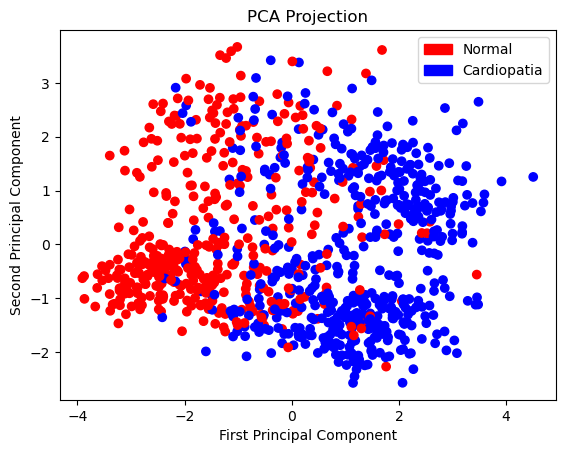

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Projection')

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Normal')
blue_patch = mpatches.Patch(color='blue', label='Cardiopatia')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

### Métodos de reducción de dimensiones:

# KPCA

In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
kpca = KernelPCA(n_components=2, kernel='poly', gamma=1/10)
X_kpca = kpca.fit_transform(X_normalized)
print(X_kpca)

In [ ]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KPCA Projection')

red_patch = mpatches.Patch(color='red', label='Normal')
blue_patch = mpatches.Patch(color='blue', label='Cardiopatia')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

# ISOMAP

In [ ]:
from sklearn.manifold import Isomap

In [ ]:
isomap = Isomap(n_components=2, n_neighbors=800, metric='manhattan')

isomap.fit(X_normalized)

X_isomap = isomap.transform(X_normalized)

print(X_isomap)

In [ ]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('Isomap Projection')

red_patch = mpatches.Patch(color='red', label='Normal')
blue_patch = mpatches.Patch(color='blue', label='Cardiopatia')
plt.legend(handles=[red_patch, blue_patch])


plt.show()

### Métodos de reducción de dimensiones (supervisado):

# PLS

In [ ]:
from sklearn.cross_decomposition import PLSRegression

In [ ]:
# Linear Discriminant Analysis (LDA)
pls = PLSRegression(n_components=2)
X_pls = pls.fit_transform(X_normalized, y)[0]

# print the transformed data
print("LDA transformed data:")
print(X_pls)

In [ ]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_pls[:, 0], X_pls[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('PLS Projection')

red_patch = mpatches.Patch(color='red', label='Normal')
blue_patch = mpatches.Patch(color='blue', label='Cardiopatia')
plt.legend(handles=[red_patch, blue_patch])


plt.show()

# UMAP

In [ ]:
import umap

In [ ]:
reducer = umap.UMAP(n_components=4)
X_umap = reducer.fit_transform(X_normalized, y)

# print the transformed data
print("UMAP transformed data:")
print(X_umap)

In [ ]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('UMAP Projection')

red_patch = mpatches.Patch(color='red', label='Normal')
blue_patch = mpatches.Patch(color='blue', label='Cardiopatia')
plt.legend(handles=[red_patch, blue_patch])


plt.show()

# PaCMAP

In [ ]:
import pacmap

In [ ]:
# PaCMAP
reducer = pacmap.PaCMAP(n_components =4)
X_pacmap = reducer.fit_transform(X_normalized)

# print the transformed data
print("PaCMAP transformed data:")
print(X_pacmap)

In [ ]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_pacmap[:, 0], X_pacmap[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('PaCMAP Projection')

red_patch = mpatches.Patch(color='red', label='Normal')
blue_patch = mpatches.Patch(color='blue', label='Cardiopatia')
plt.legend(handles=[red_patch, blue_patch])


plt.show()

###  Aglomeración

# K-means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def find_clusters(X, k, random_state=0):
    # create an instance of the KMeans class
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    
    # fit the data
    kmeans.fit(X)
    
    # get the cluster assignments
    clusters = kmeans.predict(X)
    
    return clusters

In [ ]:
clusters = find_clusters(X_normalized, 9)

# print the cluster assignments
print("Cluster assignments:")
print(clusters)

In [ ]:
# create a scatter plot of the first two dimensions of the data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')

# add axis labels
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# add a title
plt.title('Clusters found by k-means')


# show the plot
plt.show()